In [1]:
# Calculo de conv. circular. usando fft

import numpy as np

x = [1, 2, 3, 4]
y = [0, 1, 0.5, 0.25]

X = np.fft.fft(x)
Y = np.fft.fft(y)
print(X)
print(Y)

Z = X * Y 
print(Z)

z = np.fft.ifft(Z)
print(np.real(z))


[10.+0.j -2.+2.j -2.+0.j -2.-2.j]
[ 1.75+0.j   -0.5 -0.75j -0.75+0.j   -0.5 +0.75j]
[17.5+0.j   2.5+0.5j  1.5-0.j   2.5-0.5j]
[6.   3.75 3.5  4.25]


In [2]:
#implementação da fft manual

import numpy as np

def fft(P):
    n = len(P)
    if n == 1:
        return P
    w = np.exp((2j*np.pi)/n)
    P_even = fft(P[0::2])
    P_odd = fft(P[1::2])
    
    y = np.zeros(n, dtype=complex)
    
    for k in range(n//2):
        y[k] = P_even[k] + w**k * P_odd[k]
        y[k + n//2] = P_even[k] - w**k * P_odd[k]
    return y

In [3]:
#convolução circular usando a fft implementada 

X = fft(x)
Y = fft(y)
print(X)
print(Y)

Z = X * Y 
print(Z)

z = np.fft.ifft(Z)
print(np.real(z))

[10.+0.j -2.-2.j -2.+0.j -2.+2.j]
[ 1.75+0.j   -0.5 +0.75j -0.75+0.j   -0.5 -0.75j]
[17.5+0.j   2.5-0.5j  1.5-0.j   2.5+0.5j]
[6.   4.25 3.5  3.75]


Resultado 1: [6.   3.75 3.5  4.25]
Resultado 2: [6.   4.25 3.5  3.75]

In [4]:
#CZT implementada manual por somatória

import numpy as np

def czt_custosa(x, M = None, A = None, W = None):
    if M is None:
      M = len(x)
    if A is None:
      A = 1
    N = len(x)
    if W is None:
      W = np.exp((-2j * np.pi)/N)
    X = np.zeros(M, dtype=complex)
    for k in range(M):
        for n in range(N):
            X[k] += x[n] * (A ** (-n)) * (W ** (k*n))
    return X


In [5]:
resultado = czt_custosa(x)
print(x)
print(resultado)

[1, 2, 3, 4]
[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


In [6]:
# convolução circular por resto de divisão 
import numpy as np

def convolucao_circular_custosa(x, y):
    N = max(len(x), len(y))

    x = np.pad(x, (0, N - len(x)), mode='constant')
    y = np.pad(y, (0, N - len(y)), mode='constant')

    resultado = np.zeros(N)

    for k in range(N):
        for n in range(N):
            resultado[k] += x[n] * y[(k-n) % N]
    return resultado



In [7]:
print(x)
print(y)
conv = convolucao_circular_custosa(x, y)
print(conv)

[1, 2, 3, 4]
[0, 1, 0.5, 0.25]
[6.   3.75 3.5  4.25]


In [8]:
def convolucao_circular_fft(x, y):
    N = max(len(x), len(y))

    x = np.pad(x, (0, N - len(x)), mode='constant')
    y = np.pad(y, (0, N - len(y)), mode='constant')

    X = fft(x)
    Y = fft(y)

    Z = X * Y

    z = np.fft.ifft(Z)

    return np.real(z)

In [9]:
print(x)
print(y)
conv = convolucao_circular_fft(x, y)
print(conv)

[1, 2, 3, 4]
[0, 1, 0.5, 0.25]
[6.   4.25 3.5  3.75]


Resultado 1: [6.   3.75 3.5  4.25]
Resultado 2: [6.   4.25 3.5  3.75]

Não implementei a IFFT

Convolução Circular para:
p_i
q_i


In [10]:
#Entrada: 
#p = np.zeros(Q, dtype=complex)
#q = np.zeros(Q, dtype=complex)


def czt_p_e_q(x, P = None, alpha = None, M = None, R = None):
    m = len(x)
    if P is None:
        P = m
    Q = 2*P
    if alpha is None:
        alpha = 1
    if M is None:
        M = m
    if R is None:
        R = 1
    p = np.zeros(Q, dtype=complex)
    q = np.zeros(Q, dtype=complex)

    for i in range(Q):
        if i <= m:
            p[i] = x[i] * np.exp(((-1j * i * np.pi * alpha)/M)*(i-2*R))
        else:
            p[i] = 0
        if i <= P:
            q[i] = np.exp(+1j *((np.pi * alpha)/M)*i**2)
        else:
            q[i] = np.exp(+1j * ((np.pi * alpha)/ M)* (Q-i)**2)

    resultado_convolucao = convolucao_circular_fft(p, q)
    for I in range(P-1):
        X[I] = np.exp(-1j*((np.pi * alpha)/M)*I**2)*(resultado_convolucao[I])

    return X    


In [11]:
#Algorithm 3

def CZT_I(m, alpha, M, P, R):
    r = np.zeros(m, complex)
    q = np.zeros(2*P, dtype=complex)
    for i in range(m):
        r[i] = np.exp(-1j * i * ((np.pi * alpha)/M) * (i - 2 * R) )
    for i in range(2*P):
        if i <= P:
            q[i] = np.exp(+1j *((np.pi * alpha)/M) * i**2)
        else:
            q[i] = np.exp(+1j * ((np.pi * alpha)/ M) * (2*P-i)**2)
    q_hat = np.zeros(2*P, dtype=complex)
    q_hat = fft(q)
    s = np.zeros(P, dtype=complex)
    for I in range(P):
        s[I] = np.exp(-1j * ((np.pi * alpha)/ M) * I**2)
    return q_hat, r, s

In [12]:
#Algotithm 4

def CZT(x, m, P, q_hat, r, s):
    p = np.zeros(m, complex)
    for i in range(m):
        p[i] = x[i] * r[i]
    p_hat = np.zeros(m, complex)
    p_hat = fft(p) #(p,m, 2P) - rever!
    for I in range(2 * P):
        p_hat[I] = p_hat[I] * q_hat[I]
    y = np.zeros(P, complex)
    y = np.fft.ifft(p_hat)
    for I in range(P):
        y[I] = y[I] * s[I]
    return y

In [13]:
#Algorithm 1

def GALE_I(tetha, m, n, M, N, N_L, S, R_1, R_2, sigma, epsilon):
    p = np.zeros(m, complex)
    alpha = np.zeros(M, complex)
    varpi = np.zeros(M, complex)
    tau = np.zeros(M, complex)
    q_hat = np.zeros(M, complex)
    r = np.zeros(M, complex) #uma dimensão? Não duas?
    s = np.zeros(M, complex)
    t = np.zeros(n, m, dtype=complex)
    for i in range(m):
        p[i] = np.exp(+1j * i * ((2 * np.pi * R_1)/M) + sigma)
    for I in range(M):
        alpha[I] = ((4*(I-R_1)/M)-(2*sigma)/np.pi)
        q_hat[I],r[I], s[I] = CZT_I(n, alpha[I], N_L, N_L + 2 *(S+1), R_2) #r em uma dimensão 
        varpi[I] = (np.pi * (n-1)/N_L) * alpha[I]
        tau[I] = np.pi + epsilon * (np.pi - np.mod(varpi[I]))
        for j in range(n):
            t[j][I] = ((2 * np.pi * j) / N_L) * alpha[I]
            r[j][I] = r[j][I]  #r em duas dimensões






Ideia: Aplicar as implementações construidas até agora em um exemplo do Linograma

In [14]:
#Domínio do Linograma
def lino_H(M,N):
    x = []
    y = []
    for I in range(-M//2 , M//2):
        for J in range(-N//4 +1, N//4 +1):
            x.append((2*np.pi * I)/M)
            y.append(((2*np.pi*I)/M ) * ((4 * J)/N))
    return(x,y)


def lino_V(M,N):
    x = []
    y = []
    for I in range(-M//2 + 1, M//2 + 1):
        for J in range(-N//4 , N//4):
            y.append((2*np.pi * I)/M)
            x.append(((2*np.pi*I)/M ) * ((4 * J)/N))
    return(x,y)

In [15]:
import numpy as np

# Definir o tamanho da matriz m por n
m, n = 4, 4 # Por exemplo, uma matriz 4x4

# Gerar a parte real e a parte imaginária separadamente, com valores aleatórios
parte_real = np.random.rand(m, n)  # Valores reais aleatórios entre 0 e 1
parte_imaginaria = np.random.rand(m, n)  # Valores imaginários aleatórios entre 0 e 1

# Combinar para criar uma matriz complexa
x = parte_real + 1j * parte_imaginaria

# Exibir a matriz
print(x)

[[0.63744274+0.60880196j 0.19798211+0.86725903j 0.27429066+0.75261113j
  0.80995787+0.168766j  ]
 [0.94821877+0.78101207j 0.15866289+0.21493234j 0.36540594+0.2170043j
  0.52589577+0.75985608j]
 [0.15502007+0.53860436j 0.27572075+0.941877j   0.46616131+0.86817667j
  0.76709077+0.92377532j]
 [0.73676622+0.51244812j 0.94451948+0.84571446j 0.88626502+0.71611575j
  0.82540437+0.61663066j]]


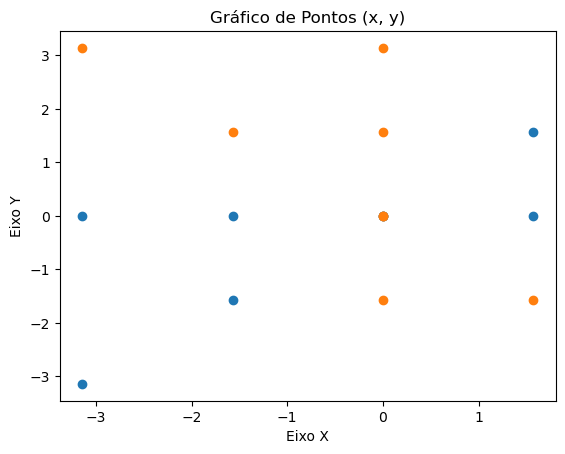

In [16]:
import matplotlib.pyplot as plt

xi_h, nu_h = lino_H(m, n)
xi_v, nu_v = lino_V(m, n)

plt.scatter(xi_h, nu_h)
plt.scatter(xi_v, nu_v)
# Adicionando rótulos aos eixos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title('Gráfico de Pontos (x, y)')

# Exibindo o gráfico
plt.show()

In [17]:
print(xi_h, nu_h)
print(xi_v, nu_v )


xi_h = np.array(xi_h)
nu_h = np.array(nu_h)
xi_v = np.array(xi_v)
nu_v = np.array(nu_v)
print(xi_h, nu_h)
print(xi_v, nu_v )


[-3.141592653589793, -3.141592653589793, -1.5707963267948966, -1.5707963267948966, 0.0, 0.0, 1.5707963267948966, 1.5707963267948966] [-0.0, -3.141592653589793, -0.0, -1.5707963267948966, 0.0, 0.0, 0.0, 1.5707963267948966]
[1.5707963267948966, -0.0, -0.0, 0.0, -1.5707963267948966, 0.0, -3.141592653589793, 0.0] [-1.5707963267948966, -1.5707963267948966, 0.0, 0.0, 1.5707963267948966, 1.5707963267948966, 3.141592653589793, 3.141592653589793]
[-3.14159265 -3.14159265 -1.57079633 -1.57079633  0.          0.
  1.57079633  1.57079633] [-0.         -3.14159265 -0.         -1.57079633  0.          0.
  0.          1.57079633]
[ 1.57079633 -0.         -0.          0.         -1.57079633  0.
 -3.14159265  0.        ] [-1.57079633 -1.57079633  0.          0.          1.57079633  1.57079633
  3.14159265  3.14159265]


In [18]:
def DTFT(x, xi, nu):
    m, n = x.shape
    x_result = np.zeros(len(xi), dtype=complex)
    for k in range(len(xi)):
        for i in range(m):
            for j in range(n):
                x_result[k] += x[i][j] * np.exp(-1j*(j*xi[k] + i*nu[k]))
    return x_result

#Aplicando a DTFT no domínio
print(DTFT(x, xi_h, nu_h))
print(DTFT(x, xi_v, nu_v))


[-0.03566328 -0.34403653j -1.00001017 +0.07707007j
  0.08457007 -1.4645049j  -0.28742543 +1.57147658j
  8.97480474+10.33358526j  8.97480474+10.33358526j
  0.88607964 +1.23842222j  2.60870805 +0.34806479j]
[ 0.10066127 +0.26467297j  0.97378466 -2.26976695j
  8.97480474+10.33358526j  8.97480474+10.33358526j
  0.27522938 -1.44116177j -0.46242371 +0.51977647j
 -1.00001017 +0.07707007j -1.80747218 +1.00615768j]


Tentar reduzir o custo usando as implementações da fft e czt

In [19]:
X_fft = np.fft.fft(x, m)

In [20]:
X_shifted = np.fft.fftshift(X_fft)

In [22]:
I_values = np.arange(-m//2, m//2)